In [ ]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

current_dir = os.getcwd()
if os.path.basename(current_dir) == 'info & examples':
    project_root = os.path.abspath(os.path.join(current_dir, '..'))
    print(f"Determined project root from 'info & examples' CWD: {project_root}")
else:
    project_root = current_dir
    print(f"Assuming CWD is project root: {project_root}")

if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added project root to sys.path: {project_root}")
else:
    print(f"Project root already in sys.path: {project_root}")

from ete_ts import (
    trend_strength,
    trend_changes,
    linear_regression_slope,
    linear_regression_r2,
    forecastability,
    fluctuation,
    ac_relevance,
    seasonal_strength,
    window_fluctuation,
    st_variation,
    diff_series,
    complexity,
    rec_concentration,
    centroid,
    info
)

Determined project root from 'info & examples' CWD: c:\Users\Utilizador\Desktop\Faculdade\Projeto Investigação - Séries Temporais\EasyTest
Added project root to sys.path: c:\Users\Utilizador\Desktop\Faculdade\Projeto Investigação - Séries Temporais\EasyTest


Attempting to load data from: c:\Users\Utilizador\Desktop\Faculdade\Projeto Investigação - Séries Temporais\EasyTest\data\AirPassengers.csv
Successfully loaded AirPassengers data. Shape: (144,)


### Original AirPassengers Data

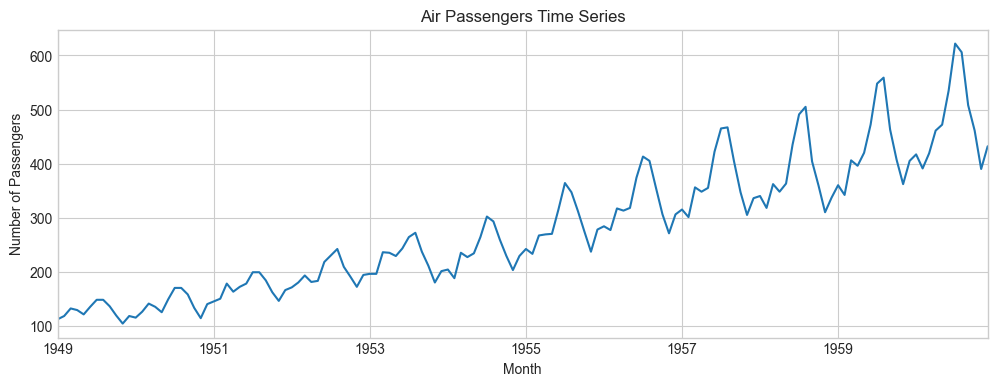

Series length (N): 144


In [2]:
# Plotting defaults 
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['figure.dpi'] = 100

# Load AirPassengers Data 
data_file_path = os.path.join(project_root, 'data', 'AirPassengers.csv')
print(f"Attempting to load data from: {data_file_path}")

df_air = pd.read_csv(
    data_file_path,
    parse_dates=['Month'],
    index_col='Month'
)

if '#Passengers' not in df_air.columns:
    if 'Passengers' in df_air.columns:
        df_air.rename(columns={'Passengers': '#Passengers'}, inplace=True)
        print("Renamed 'Passengers' column to '#Passengers'")
    else:
        raise KeyError("Could not find '#Passengers' column or 'Passengers'. Please check CSV.")

passenger_series_np = df_air['#Passengers'].to_numpy(dtype=float)
print(f"Successfully loaded AirPassengers data. Shape: {passenger_series_np.shape}")

# Plot the data
display(Markdown("### Original AirPassengers Data"))
df_air['#Passengers'].plot()
plt.title('Air Passengers Time Series')
plt.ylabel('Number of Passengers')
plt.show()

# Define series length
N = len(passenger_series_np)
print(f"Series length (N): {N}")

In [3]:
info()


Small description of the features.
For the full documentation see the library oficial website: https://franciscovmacieira.github.io/easyts/ or the library GitHub repository: https://github.com/franciscovmacieira/Deep-Time-Series-Analysis.git
trend_strength: Computes the strength of a trend within the time-series.
median_crosses: Counts the number of times the time-series crosses its median.
trend_changes: Detects the number of trend changes in the time-series.
linear_regression_slope: Computes the slope of a linear regression fitted to the time-series.
linear_regression_r2: Computes the R-squared value of a linear regression fitted to the time-series.
forecastability: Measures the forecastability of the time-series using spectral entropy.
entropy_pairs: Computes the entropy of the time-series.
fluctuation: Measures the fluctuation of the time-series.
ac_relevance: Computes the autocorrelation relevance of the time-series.
seasonal_strength: Computes the strength of seasonality within 

In [4]:
display(Markdown("### Trend Strength - Test 1: `Default`"))
t_strength = trend_strength(passenger_series_np)  # Defaults: period='1', seasonal=7, robust=False
print(f"Trend Strength computed a strength of {t_strength:.3f}")

### Trend Strength - Test 1: `Default`

Trend Strength computed a strength of 0.998


In [5]:
display(Markdown("### Trend Strength - Test 2: `period=12`, `seasonal=13`, `robust=True`"))
t_strength = trend_strength(passenger_series_np, period=12,seasonal=13, robust=True)
print(f"Trend Strength computed a strength of {t_strength:.3f}")

### Trend Strength - Test 2: `period=12`, `seasonal=13`, `robust=True`

Trend Strength computed a strength of 0.996


In [6]:
display(Markdown("### Trend Strength - Test 3: `period=24`, `robust=True`"))
t_strength = trend_strength(passenger_series_np, period = 24, robust=False)
print(f"Trend Strength computed a strength of {t_strength:.3f}")


### Trend Strength - Test 3: `period=24`, `robust=True`

Trend Strength computed a strength of 0.997


In [7]:
display(Markdown("### Trend Changes - Test 1: `Default`"))
n_changes = trend_changes(passenger_series_np) # Defaults: model='l2', min_size=2, jump=5
print(f"Trend Changes found {n_changes} change points")

### Trend Changes - Test 1: `Default`

Trend Changes found 27 change points


In [8]:
display(Markdown("### Trend Changes - Test 2: `model='l1', min_size=3`"))
n_changes = trend_changes(passenger_series_np, model="l1", min_size=3)
print(f"Trend Changes found {n_changes} change points")

### Trend Changes - Test 2: `model='l1', min_size=3`

Trend Changes found 26 change points


In [9]:
display(Markdown("### Trend Changes - Test 3: `jump=10`"))
n_changes = trend_changes(passenger_series_np, jump=10)
print(f"Trend Changes found {n_changes} change points")

### Trend Changes - Test 3: `jump=10`

Trend Changes found 14 change points


In [10]:
display(Markdown("### Linear Regression Slope - Test 1: `Default`"))
slope = linear_regression_slope(passenger_series_np)
print(f"The computed value for the slope of the series' Linear Regression was {slope:.3f}")

### Linear Regression Slope - Test 1: `Default`

The computed value for the slope of the series' Linear Regression was 2.657


In [11]:
display(Markdown("### Linear Regression R2 - Test 1: `Default`"))
fit = linear_regression_r2(passenger_series_np)
print(f"The computed value for this series' Linear Regression fit was {fit:.3f}")

### Linear Regression R2 - Test 1: `Default`

The computed value for this series' Linear Regression fit was 0.854


In [12]:
display(Markdown("### Series Forecastability - Test 1: `sf=12`"))
fore = forecastability(passenger_series_np, sf=12)
print(f"The computed value for this series' forecastability was {fore:.3f}")

### Series Forecastability - Test 1: `sf=12`

The computed value for this series' forecastability was 0.479


In [13]:
display(Markdown("### Series Forecastability - Test 2: `sf=24`, `method='fft'`, `normalize=True`"))
fore = forecastability(passenger_series_np, sf=24, method='fft', normalize=True)
print(f"The computed value for this series' forecastability was {fore:.3f}")

### Series Forecastability - Test 2: `sf=24`, `method='fft'`, `normalize=True`

The computed value for this series' forecastability was 2.332


In [14]:
display(Markdown("### Series Forecastability - Test 3: `sf=6`, `method='welch'`, `nperseg=3`, `normalize=True`"))
fore = forecastability(passenger_series_np, sf=6, method='welch', nperseg=3, normalize=True)
print(f"The computed value for this series' forecastability was {fore:.3f}")

### Series Forecastability - Test 3: `sf=6`, `method='welch'`, `nperseg=3`, `normalize=True`

The computed value for this series' forecastability was 1.289


In [15]:
display(Markdown("### Series Fluctuation - Test 1: `Default`"))
fluct = fluctuation(passenger_series_np)
print(f"The computed value for this series' fluctuation was {fluct:.3f}")

### Series Fluctuation - Test 1: `Default`

The computed value for this series' fluctuation was 0.895


In [16]:
display(Markdown("### Window Fluctuation - Test 1: `Default`"))
w_fluct = window_fluctuation(passenger_series_np)
print(f"The computed value for this series' window fluctuation was {w_fluct:.3f}")

### Window Fluctuation - Test 1: `Default`

The computed value for this series' window fluctuation was 0.769


In [17]:
display(Markdown("### Autocorrelation Relevance - Test 1: `Default`"))
ac_r = ac_relevance(passenger_series_np)
print(f"The point at which autocorrelation dropped below 1/e for the first time was {ac_r:.3f}")

### Autocorrelation Relevance - Test 1: `Default`

The point at which autocorrelation dropped below 1/e for the first time was 27.498


In [18]:
display(Markdown("### Seasonal Strength - Test 1: `Default`"))
s_strength = seasonal_strength(passenger_series_np)
print(f"Seasonal Strength computed a strength of {s_strength:.3f}")

### Seasonal Strength - Test 1: `Default`

Seasonal Strength computed a strength of 0.987


In [19]:
display(Markdown("### Seasonal Strength - Test 2: `period=12`, `seasonal=13`, `robust=True`"))
s_strength = seasonal_strength(passenger_series_np, period=12, seasonal=13, robust=True)
print(f"Seasonal Strength computed a strength of {s_strength:.3f}")

### Seasonal Strength - Test 2: `period=12`, `seasonal=13`, `robust=True`

Seasonal Strength computed a strength of 0.972


In [20]:
display(Markdown("### Seasonal Strength - Test 3: `seasonal=3`, `robust=False`"))
s_strength = seasonal_strength(passenger_series_np, seasonal=3, robust=False)
print(f"Seasonal Strength computed a strength of {s_strength:.3f}")

### Seasonal Strength - Test 3: `seasonal=3`, `robust=False`

Seasonal Strength computed a strength of 0.997


In [21]:
display(Markdown("### Short-Term Variation - Test 1: `Default`"))
st_v = st_variation(passenger_series_np)
print(f"The short-term variation computed value was {st_v:.3f}")

### Short-Term Variation - Test 1: `Default`

The short-term variation computed value was -0.003


In [22]:
display(Markdown("### Differenced Series - Test 1: `Default`"))
diff = diff_series(passenger_series_np)
print(f"The computed value of the differenced series' autocorrelation was {diff:.3f}")

### Differenced Series - Test 1: `Default`

The computed value of the differenced series' autocorrelation was 0.409


In [23]:
display(Markdown("### Series Complexity - Test 1: `Default`"))
comp = complexity(passenger_series_np)
print(f"The computed value for the series' complexity was {comp:.3f}")

### Series Complexity - Test 1: `Default`

The computed value for the series' complexity was 3.372


In [24]:
display(Markdown("### Records Concentration - Test 1: `Default`"))
rec = rec_concentration(passenger_series_np)
print(f"The relative position of the most probable value in relation to the mean is {rec:.3f}")

### Records Concentration - Test 1: `Default`

The relative position of the most probable value in relation to the mean is -0.822


In [25]:
display(Markdown("### Series Centroid - Test 1: `fs=1`"))
cent = centroid(passenger_series_np, fs=1)
print(f"The computed value for the series' centroid was {cent:.3f}")

### Series Centroid - Test 1: `fs=1`

The computed value for the series' centroid was 100.908


In [26]:
display(Markdown("### Series Centroid - Test 2: `fs=12`"))
cent = centroid(passenger_series_np, fs=12)
print(f"The computed value for the series' centroid was {cent:.3f}")

### Series Centroid - Test 2: `fs=12`

The computed value for the series' centroid was 8.409


In [27]:
display(Markdown("### Series Centroid - Test 3: `fs=48`"))
cent = centroid(passenger_series_np, fs=48)
print(f"The computed value for the series' centroid was {cent:.3f}")

### Series Centroid - Test 3: `fs=48`

The computed value for the series' centroid was 2.102
